## Step 1: Segment-Wise Feature Analysis

`Objective:` Understand the characteristics and variations of smartphones across budget, midrange, and flagship segments.

`Key Tasks:`

- Define price ranges to categorize the dataset into budget, midrange, and flagship segments.

- Analyze the distribution of core features (e.g., RAM, battery capacity, processor speed).

- Identify price ranges for each segment and their overlaps, if any.

- Compare the prevalence of advanced features (e.g., 5G, NFC, fast charging) in midrange and flagship phones.

`Deliverables for Step 1:`

- Average values for features like RAM, battery, processor speed per segment.

- Price range distribution for budget, midrange, and flagship.

- Comparative charts for feature prevalence (e.g., 5G adoption).

# Import Libraries

In [1]:
import os

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from pathlib import Path

from src.utils.utils import get_data, outlier_overview, export_data, prepare_segment_trends_data

from src.constants.constants import FIG_SIZE

In [2]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None) 

# Read the Data

In [3]:
df = get_data("smartphone_cleaned_v5", "raw")
analysis_df = prepare_segment_trends_data(df)
analysis_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,0.0
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,0.0


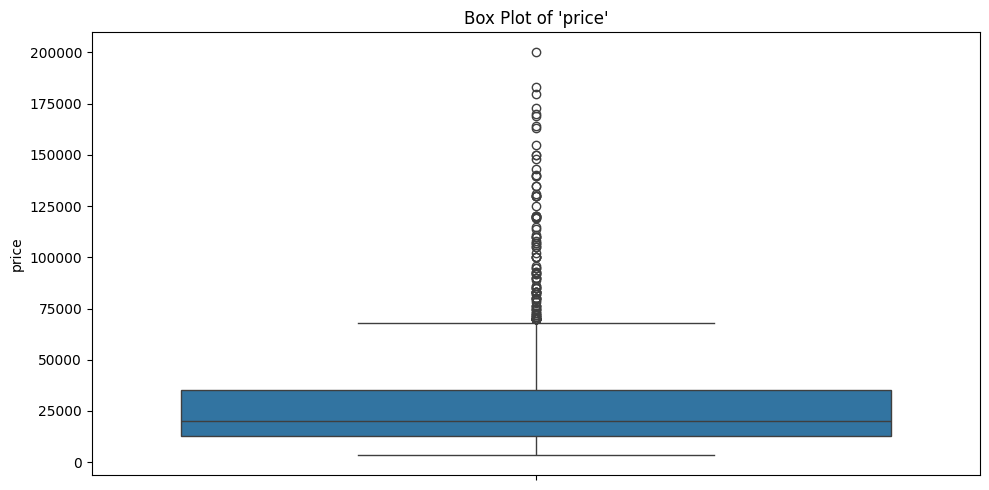

count       976.000000
mean      31029.820697
std       29870.079162
min        3499.000000
25%       12999.000000
50%       19990.000000
75%       34999.000000
max      199990.000000
Name: price, dtype: float64

In [4]:
outlier_overview(dataframe= analysis_df, column_name = "price")

<Axes: xlabel='price', ylabel='Count'>

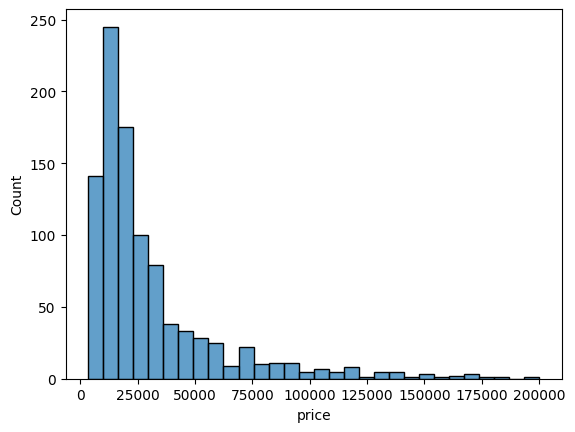

In [5]:
sns.histplot(data = analysis_df, x = "price", bins = 30, alpha = 0.7)

In [6]:
## % of smartphones priced under 23000

(
    analysis_df
    .loc[lambda x: x['price'] <= 23000]
    .shape[0] / len(analysis_df) * 100
)

57.479508196721305

In [7]:
# % of smartphones priced between 23,000 and 60,000

(
    analysis_df
    .loc[lambda x: (x['price'] > 23000) & (x['price'] <= 50000)]
    .shape[0] / len(analysis_df) * 100
)

26.434426229508194

In [8]:
# % of smartphones priced between above 50,000

(
    analysis_df
    .loc[lambda x: x['price'] > 50000]
    .shape[0] / len(analysis_df) * 100
)

16.08606557377049

## Observations

- The smartphone market is budget oriented with a large number of phones `(57%)` under 23,000.
- 26% of phones are priced between between 23,000 and 50,000.
- 16 % of phones are priced above 50,000.
- From the peaks in the histogram the price ranges of smartphones is determined which is matching with the domain knowledge. 

# Actions to be taken

- Divide the data into three segments based on price. 

In [9]:
budget = (
    analysis_df
    .loc[lambda x: x['price'] <= 23000]
)

In [10]:
mid = (
    analysis_df
    .loc[lambda x: (x['price'] > 23000) & (x['price'] <= 50000)]
)

In [11]:
premium = (
    analysis_df
    .loc[lambda x: x['price'] > 50000]
)

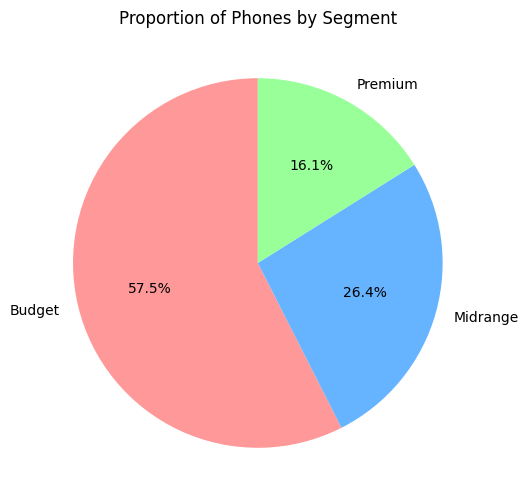

In [12]:
# % of smartphones for each segemnt in the market   

segment_counts = {
    "Budget": len(budget),
    "Midrange": len(mid),
    "Premium": len(premium),
}

# Plot the pie chart
plt.figure(figsize = FIG_SIZE)
plt.pie(
    segment_counts.values(),
    labels = segment_counts.keys(),
    autopct = '%1.1f%%',
    startangle = 90,
    colors = ['#ff9999','#66b3ff','#99ff99']  
)

plt.title("Proportion of Phones by Segment")
plt.show()

# Typical characteristics of smartphones in each segment

In [13]:
budget.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

In [14]:
# List of features to analyze
features = ['ram_capacity', 'battery_capacity', 'processor_speed']

# Calculate averages for each feature in each segment
segment_features = (
    pd.concat([budget, mid, premium], keys=['Budget', 'Midrange', 'Premium'])
    .groupby(level=0)[features]
    .median()
    .rename_axis('Segment')
    .reset_index()
)

segment_features

,Segment,ram_capacity,battery_capacity,processor_speed
0,Budget,4.0,5000.0,2.20
1,Midrange,8.0,4700.0,2.84
2,Premium,8.0,4500.0,3.10


In [15]:
# Create a pivot table for mean and median
segment_features = (
    pd.concat([budget, mid, premium], keys = ['Budget', 'Midrange', 'Premium'])
    .groupby(level=0)[['ram_capacity', 'battery_capacity', 'processor_speed']]
    .agg(['mean', 'median'])
)

# Reset the index and reshape for visualization
(
    segment_features
    .rename_axis('Segment')
    .reset_index()
)

Segment ram_capacity        battery_capacity         processor_speed  \
                    mean median             mean  median            mean   
0    Budget     5.128342    4.0      4919.304813  5000.0        2.139855   
1  Midrange     8.058140    8.0      4816.220472  4700.0        2.727247   
2   Premium     9.165605    8.0      4465.820000  4500.0        3.035182   

          
  median  
0   2.20  
1   2.84  
2   3.10

## Observations

- RAM capacity is lower in budget segment in comparison to midrange, and premium smartphones.- Battery capacity is highest in budget followed by midrange, and premium.
- Processor speed is lower in budget smartphones.


# How do the features vary across segments?

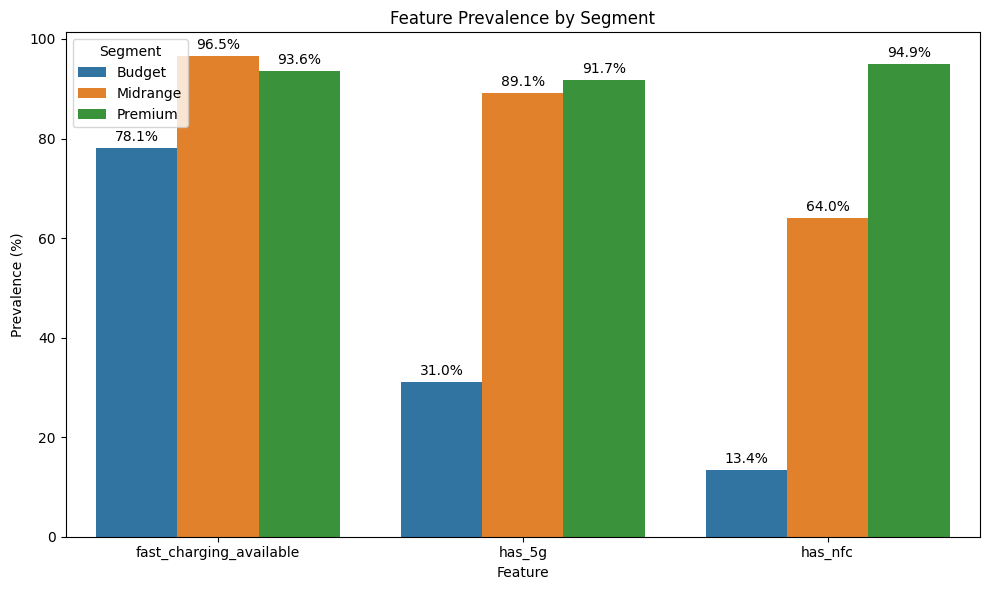

In [22]:
# Calculate prevalence (percentage) of features by segment

feature_prevalence = (
    pd.concat([budget, mid, premium], keys=['Budget', 'Midrange', 'Premium'], names=['Segment'])
    .groupby(level = 0)[['fast_charging_available', 'has_5g', 'has_nfc']]
    .mean()
    .mul(100) 
    .reset_index() 
    .melt(id_vars = 'Segment', var_name = 'Feature', value_name = 'Prevalence (%)')
)

# Plot the prevalence
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = feature_prevalence, x = 'Feature', y = 'Prevalence (%)', hue = 'Segment')
plt.title("Feature Prevalence by Segment")
plt.ylabel("Prevalence (%)")
plt.xlabel("Feature")
plt.legend(title="Segment")
plt.tight_layout()

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f%%', label_type = 'edge', fontsize = 10, padding = 3)

plt.show()


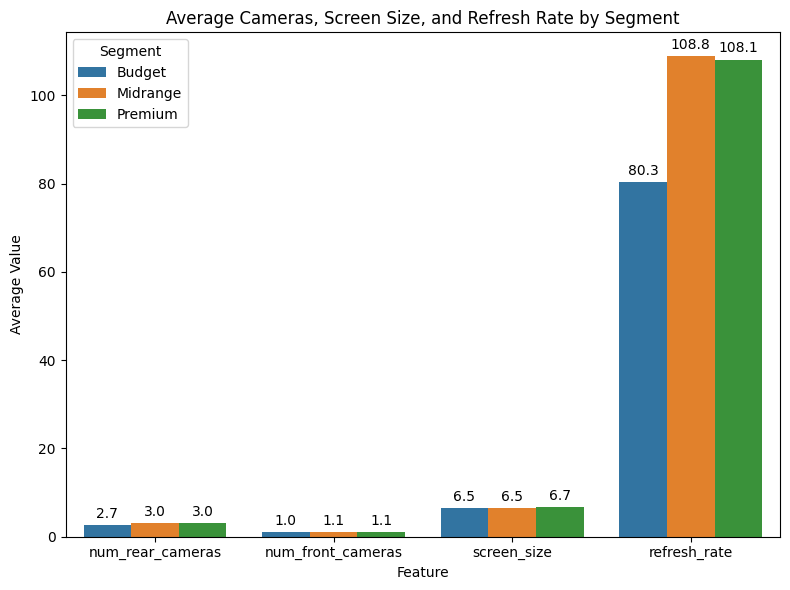

In [24]:
# Calculate averages for cameras, screen size, and refresh rate
camera_screen_refresh = (
    pd.concat([budget, mid, premium], keys = ['Budget', 'Midrange', 'Premium'], names = ['Segment'])
    .groupby(level=0)[['num_rear_cameras', 'num_front_cameras', 'screen_size', 'refresh_rate']]
    .mean()
    .reset_index()
    .melt(id_vars = 'Segment', var_name = 'Feature', value_name = 'Average Value')
)

# Plot the averages
plt.figure(figsize = FIG_SIZE)
ax = sns.barplot(data = camera_screen_refresh, x = 'Feature', y = 'Average Value', hue = 'Segment')
plt.title("Average Cameras, Screen Size, and Refresh Rate by Segment")
plt.ylabel("Average Value")
plt.xlabel("Feature")
plt.legend(title = "Segment")
plt.tight_layout()

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f', label_type = 'edge', fontsize = 10, padding = 3)

plt.show()

## Observations

- Fast charging prevalence is lesser in budget segment but sill comparable to the other segments.
- 5g is very less present in budget segment only about 31%.
- Nfc is mostly present in premium followed by mid range and very less in budget segment.
- Refresh rate is generally lesser in budget as compared to premium and mid range.